In [6]:
from pathlib import Path
from tuned_lens.utils import pytree_stack
import torch as th

th.set_grad_enabled(False)
root = Path("/mnt/ssd-1/nora/real-lenses/pythia/12b-deduped/affine/downstream/")
# batches = root.rglob("batch_*.pt")
batches = [
    th.load(path, map_location="cpu")
    for path in root.rglob("batch_*.pt")
]
master = pytree_stack(batches)

In [10]:
from tuned_lens.utils import pytree_map
pytree_map(lambda x: x.shape, master)

{'baseline_ce': {'input': torch.Size([8000, 2047]),
  '0.ffn': torch.Size([8000, 2047]),
  '1.ffn': torch.Size([8000, 2047]),
  '2.ffn': torch.Size([8000, 2047]),
  '3.ffn': torch.Size([8000, 2047]),
  '4.ffn': torch.Size([8000, 2047]),
  '5.ffn': torch.Size([8000, 2047]),
  '6.ffn': torch.Size([8000, 2047]),
  '7.ffn': torch.Size([8000, 2047]),
  '8.ffn': torch.Size([8000, 2047]),
  '9.ffn': torch.Size([8000, 2047]),
  '10.ffn': torch.Size([8000, 2047]),
  '11.ffn': torch.Size([8000, 2047]),
  '12.ffn': torch.Size([8000, 2047]),
  '13.ffn': torch.Size([8000, 2047]),
  '14.ffn': torch.Size([8000, 2047]),
  '15.ffn': torch.Size([8000, 2047]),
  '16.ffn': torch.Size([8000, 2047]),
  '17.ffn': torch.Size([8000, 2047]),
  '18.ffn': torch.Size([8000, 2047]),
  '19.ffn': torch.Size([8000, 2047]),
  '20.ffn': torch.Size([8000, 2047]),
  '21.ffn': torch.Size([8000, 2047]),
  '22.ffn': torch.Size([8000, 2047]),
  'final': torch.Size([8000, 2047])},
 'baseline_entropy': {'input': torch.Size([800

In [29]:
from tuned_lens.stats import spearmanr

kl_tensor = th.stack(list(master['lens_kl'].values())).squeeze()

In [38]:
import torch.nn.functional as F

N = 3
trigram = F.conv1d(monotonicities.unsqueeze(1), th.ones(1, 1, N) / N).squeeze()

In [44]:
import torch.nn.functional as F

N = 2
bigram = F.conv1d(monotonicities.unsqueeze(1), th.ones(1, 1, N) / N).squeeze()

(array([4.189740e+06, 3.312138e+06, 2.154882e+06, 1.422908e+06,
        1.061610e+06, 7.831890e+05, 6.024500e+05, 4.473460e+05,
        3.728650e+05, 2.926230e+05, 2.325730e+05, 1.821090e+05,
        1.529590e+05, 1.249460e+05, 9.964800e+04, 8.760800e+04,
        7.455500e+04, 6.475400e+04, 5.521200e+04, 5.105200e+04,
        4.646200e+04, 4.230500e+04, 3.638900e+04, 3.432800e+04,
        3.172700e+04, 2.759800e+04, 2.659300e+04, 2.441000e+04,
        2.247000e+04, 2.014000e+04, 1.922600e+04, 1.768300e+04,
        1.651400e+04, 1.474900e+04, 1.425200e+04, 1.363700e+04,
        1.251300e+04, 1.108700e+04, 1.065100e+04, 1.023500e+04,
        9.061000e+03, 8.759000e+03, 8.397000e+03, 7.931000e+03,
        7.118000e+03, 7.052000e+03, 6.624000e+03, 6.282000e+03,
        5.619000e+03, 5.747000e+03, 5.512000e+03, 5.133000e+03,
        5.039000e+03, 4.901000e+03, 4.985000e+03, 4.291000e+03,
        4.366000e+03, 4.078000e+03, 3.969000e+03, 3.706000e+03,
        3.849000e+03, 3.331000e+03, 2.89

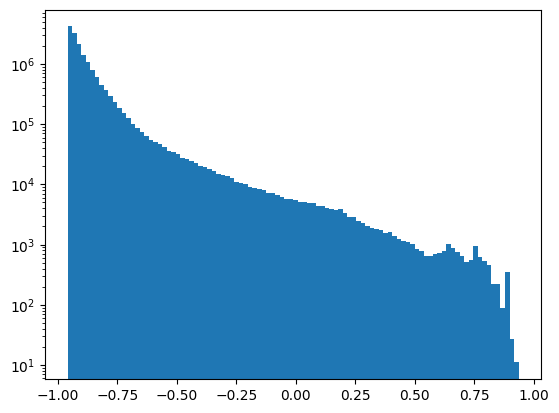

In [46]:
import matplotlib.pyplot as plt

plt.hist(monotonicities.flatten(), log=True, bins=100)

(array([2.122746e+06, 3.230739e+06, 2.636007e+06, 2.000916e+06,
        1.442150e+06, 1.066741e+06, 7.854530e+05, 5.885320e+05,
        4.247420e+05, 3.204650e+05, 2.493030e+05, 2.047260e+05,
        1.619010e+05, 1.354220e+05, 1.168970e+05, 9.782500e+04,
        8.466100e+04, 7.431300e+04, 6.719400e+04, 5.759600e+04,
        5.075700e+04, 4.529400e+04, 4.076900e+04, 3.581900e+04,
        3.257300e+04, 2.994800e+04, 2.656600e+04, 2.424200e+04,
        2.272700e+04, 2.170200e+04, 1.939900e+04, 1.821000e+04,
        1.684900e+04, 1.489800e+04, 1.254600e+04, 1.127800e+04,
        9.500000e+03, 8.874000e+03, 7.634000e+03, 6.619000e+03,
        6.073000e+03, 5.117000e+03, 4.547000e+03, 4.059000e+03,
        4.017000e+03, 3.936000e+03, 3.280000e+03, 3.073000e+03,
        2.800000e+03, 2.278000e+03, 1.765000e+03, 1.528000e+03,
        1.203000e+03, 9.030000e+02, 8.000000e+02, 6.760000e+02,
        5.310000e+02, 4.960000e+02, 4.480000e+02, 4.060000e+02,
        3.300000e+02, 2.660000e+02, 2.24

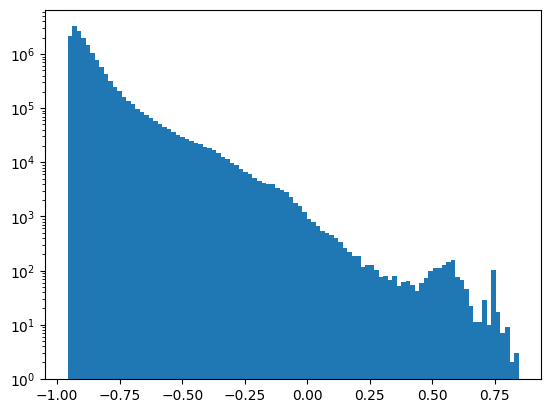

In [45]:
import matplotlib.pyplot as plt

plt.hist(bigram.flatten(), log=True, bins=100)

(array([1.049878e+06, 2.689545e+06, 2.728743e+06, 2.262988e+06,
        1.762398e+06, 1.323272e+06, 9.667930e+05, 7.022840e+05,
        5.177530e+05, 3.903390e+05, 3.030300e+05, 2.413510e+05,
        1.963990e+05, 1.647220e+05, 1.390790e+05, 1.184110e+05,
        1.009170e+05, 8.651300e+04, 7.600700e+04, 6.611700e+04,
        5.839900e+04, 5.322600e+04, 4.838800e+04, 4.379700e+04,
        3.951000e+04, 3.432800e+04, 2.902400e+04, 2.475800e+04,
        2.097600e+04, 1.786400e+04, 1.518000e+04, 1.313200e+04,
        1.146600e+04, 1.049500e+04, 9.073000e+03, 7.933000e+03,
        6.773000e+03, 5.309000e+03, 4.444000e+03, 3.470000e+03,
        2.917000e+03, 2.353000e+03, 1.989000e+03, 1.729000e+03,
        1.396000e+03, 1.199000e+03, 1.029000e+03, 9.290000e+02,
        8.300000e+02, 7.270000e+02, 6.730000e+02, 5.130000e+02,
        5.280000e+02, 4.590000e+02, 4.230000e+02, 4.010000e+02,
        4.340000e+02, 3.840000e+02, 3.960000e+02, 4.640000e+02,
        4.680000e+02, 4.920000e+02, 5.51

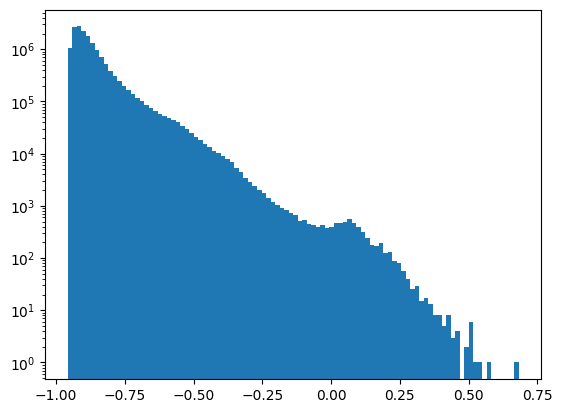

In [43]:
import matplotlib.pyplot as plt

plt.hist(trigram.flatten(), log=True, bins=100)

In [39]:
th.quantile(trigram, th.tensor(0.95))

tensor(-0.6969)

In [41]:
trigram.flatten().neg().kthvalue(1000).values

tensor(-0.1606)